<a href="https://colab.research.google.com/github/dantls/python-with-financial-market/blob/main/02_Analisando_Acoes_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=9c0ece2b3074400f256e7e21d28df946409bdc925c4c48978d5ff697555ba0fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-p05tx9ei/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Obtendo dados do mercado financeiro

## Buscando dados do IBovespa

In [2]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


## Verificando dados mais antigos

In [3]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


## Verificando dados atuais

In [4]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-28,117806.0,119213.0,117805.0,119051.000000,119051.000000,7171700
2020-12-29,119130.0,119861.0,118750.0,119475.000000,119475.000000,6769700
2020-12-30,119410.0,120150.0,118919.0,119306.000000,119306.000000,8235700
2021-01-04,119024.0,120354.0,118062.0,118558.000000,118558.000000,8741400
2021-01-05,0.0,0.0,0.0,119376.210938,119376.210938,0


#Plotando gráficos

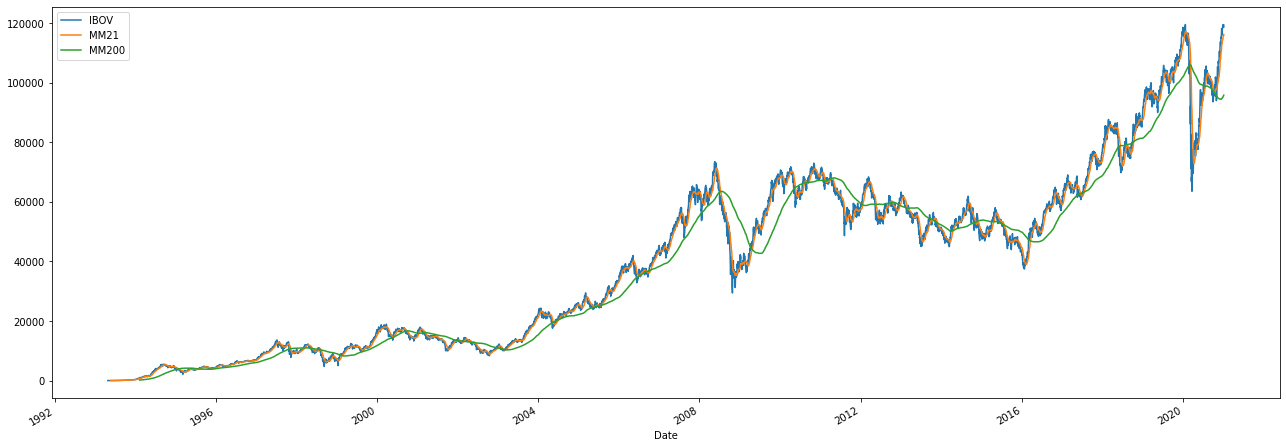

In [7]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()



## Filtrar dados de ano específico

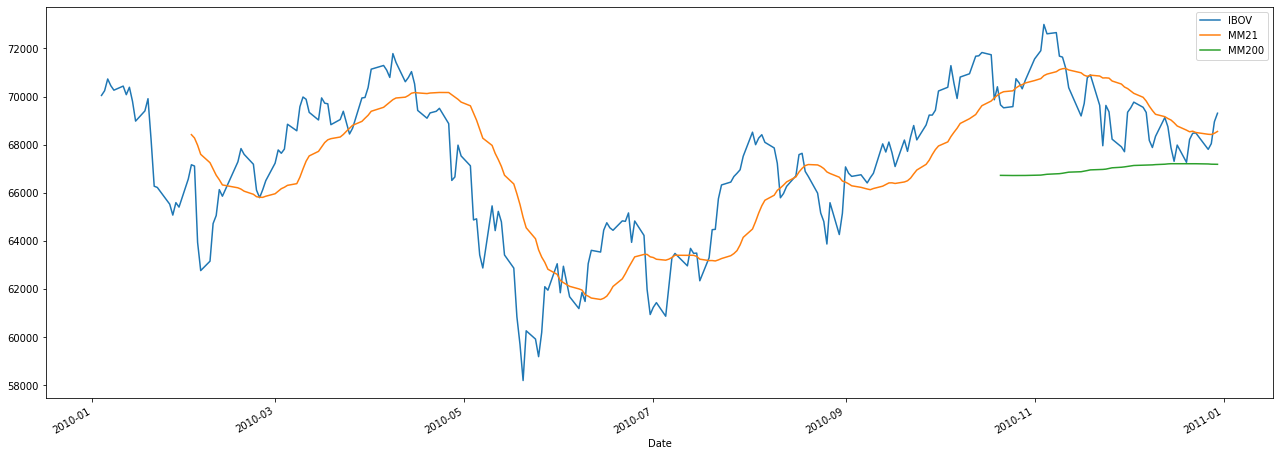

In [9]:
ibov_fatiado = ibov[ibov.index.year == 2010]


ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

## Filtrar dados em um intervalo

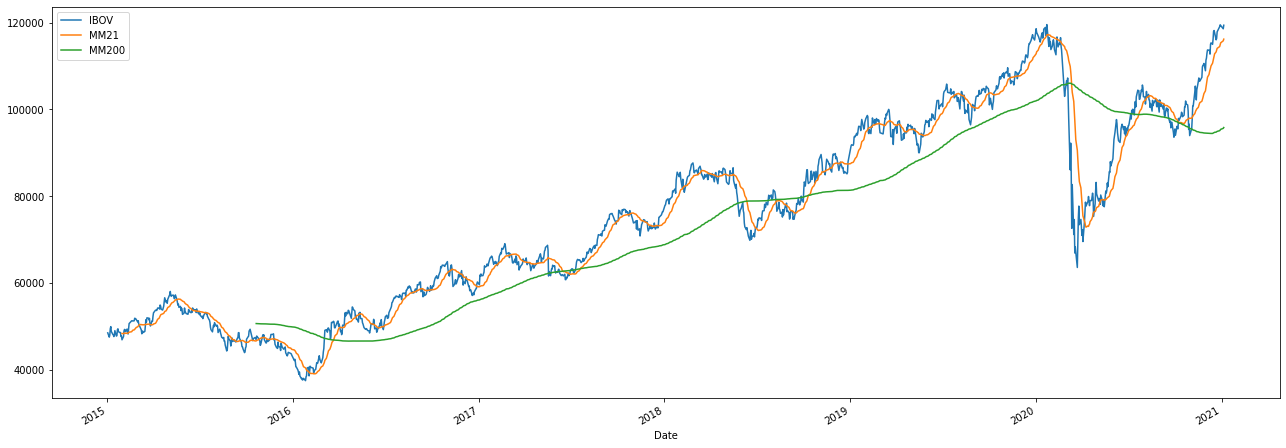

In [12]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2021)]


ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

## Dia

In [14]:
ibov_day = ibov[ibov.index.day == 12]

ibov_day

ibov_day.tail(5)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-12,85103.0,85103.0,68488.0,72583.0,72583.0,12008700
2020-05-12,79065.0,80344.0,77872.0,77872.0,77872.0,10245400
2020-06-12,94677.0,94703.0,90811.0,92795.0,92795.0,12785600
2020-08-12,102176.0,103116.0,100698.0,102118.0,102118.0,10114200
2020-11-12,104810.0,105019.0,102034.0,102175.0,102175.0,10860300


## Month

In [32]:
ibov_month = ibov[ibov.index.month== 12]

ibov_month

ibov_month.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-22,115825.0,116903.0,115648.0,116348.0,116348.0,6947900
2020-12-23,116636.0,118311.0,116636.0,117857.0,117857.0,6483300
2020-12-28,117806.0,119213.0,117805.0,119051.0,119051.0,7171700
2020-12-29,119130.0,119861.0,118750.0,119475.0,119475.0,6769700
2020-12-30,119410.0,120150.0,118919.0,119306.0,119306.0,8235700


#**VALE**

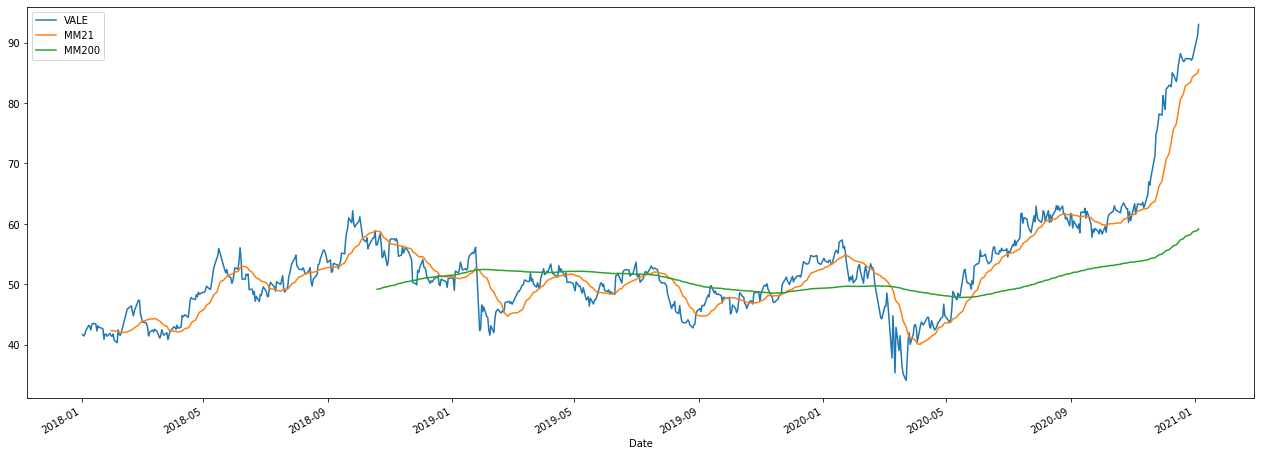

In [40]:

vale = web.get_data_yahoo('VALE3.SA', start="2018-01-01", end="2021-01-10")
vale_fatiado = vale[(vale.index.year >= 2018) & (vale.index.year <= 2021)]

vale_fatiado["Close"].plot(figsize=(22,8), label="VALE")
vale_fatiado["Close"].rolling(21).mean().plot(label="MM21")
vale_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

#**MAGALU**

[*********************100%***********************]  1 of 1 completed


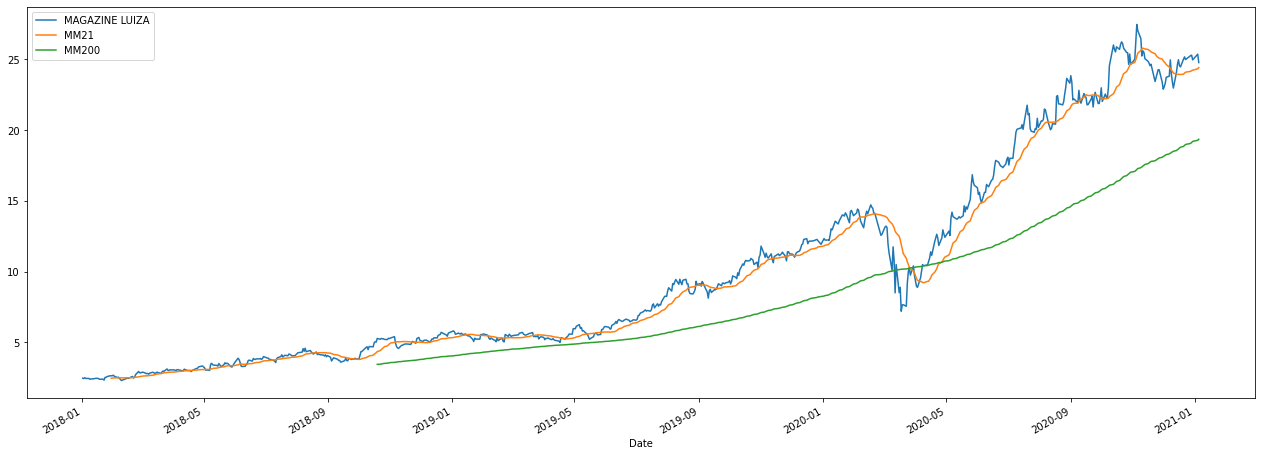

In [45]:
magalu = web.get_data_yahoo('MGLU3.SA', start="2018-01-01", end="2021-01-10")
magalu_fatiado = vale[(vale.index.year >= 2018) & (vale.index.year <= 2021)]


magalu_fatiado["Close"].plot(figsize=(22,8), label="MAGAZINE LUIZA")
magalu_fatiado["Close"].rolling(21).mean().plot(label="MM21")
magalu_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

#**GOLD**

[*********************100%***********************]  1 of 1 completed


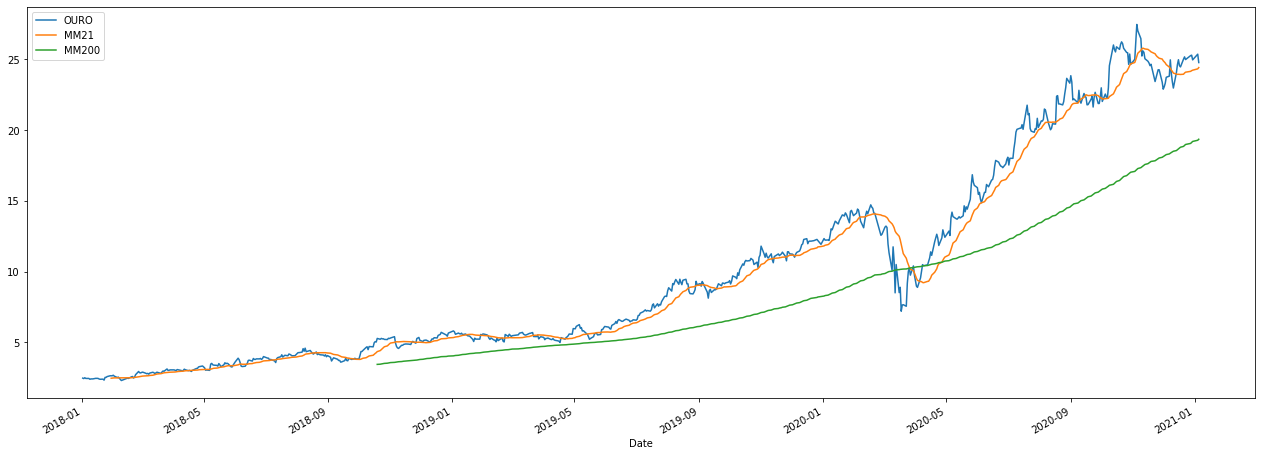

In [43]:
gold = web.get_data_yahoo('GC=F', start="2018-01-01", end="2021-01-10")
gold_fatiado = vale[(vale.index.year >= 2018) & (vale.index.year <= 2021)]


gold_fatiado["Close"].plot(figsize=(22,8), label="OURO")
gold_fatiado["Close"].rolling(21).mean().plot(label="MM21")
gold_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()